<font size = 6>Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys 
import os

sys.path.append("C:\\Program Files\\Lumerical\\v202\\api\\python\\") #Default windows lumapi path
#sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi

sys.path.append(os.path.dirname('C:\\Users\\andre\\Documents\\GitHub\\Photonics\\Ring Resonator')) #Current directory
#sys.path.append(os.path.dirname('/home/trainner/Documents/Andre/GitHub/Photonics'))

<font size = 6>Open Lumerical

In [2]:
fdtd = lumapi.FDTD(filename = 'RingResonator.fsp')

<font size = 6>Initial Parameters

In [3]:
c0 = 299792458
lmbd = np.linspace(1.5e-6, 1.6e-6, 200)
radius = 3e-6
gap = 150e-9
width = 0.4e-6
height = 0.18e-6
lc = 0
L = 20e-6

<font size = 6>Assembly

In [33]:
fdtd.switchtolayout()
fdtd.selectall()
fdtd.delete()

fdtd.addobject('ring_resonator')
fdtd.set({
    'x'                         : -L/2,
    'y'                         : 0,
    'z'                         : 0,
    'Lc'                        : lc,
    'gap'                       : gap,
    'radius'                    : radius,
    'base width'                : width,
    'base height'               : height,
    'material'                  : 'Si (Silicon) - Palik',
    'x span'                    : L
})

fdtd.addfdtd()
fdtd.set({
    'x'                         : 0,
    'x span'                    : L+2e-6,
    'y'                         : 0,
    'y span'                    : 10e-6,
    'z'                         : 0,
    'z span'                    : 2e-6,
    'background material'       : 'SiO2 (Glass) - Palik',
    'mesh accuracy'             : 3,
    'z min bc'                  : 'Symmetric',
    'set simulation bandwidth'  : 1,
    'simulation wavelength min' : 1.5e-6,
    'simulation wavelength max' : 1.6e-6,
    'simulation time'           : 3e-12
})

fdtd.addport()
fdtd.set({
    'x'                         : -1.25*radius,
    'z'                         : 0,
    'y'                         : radius + gap + width,
    'y span'                    : 2e-6,
    'z span'                    : 2e-6,
    'direction'                 : 'Forward'
})

fdtd.addport()
fdtd.set({
  'x'                           : 1.25*radius,
  'z'                           : 0,
  'y'                           : radius + gap + width,
  'y span'                      : 2e-6,
  'z span'                      : 2e-6,
  'direction'                   :'Backward'
})

fdtd.addport()
fdtd.set({
  'x'                           : -1.25*radius,
  'z'                           : 0,
  'y'                           : -(radius + gap + width),
  'y span'                      : 2e-6,
  'z span'                      : 2e-6,
  'direction'                   : 'Forward'
})

fdtd.addport()
fdtd.set({
  'x'                           : 1.25*radius,
  'z'                           : 0,
  'y'                           : -(radius + gap + width),
  'y span'                      : 2e-6,
  'z span'                      : 2e-6,
  'direction'                   :'Backward'
})

<font size = 6>LC Sweep (Straight Waveguide)

In [34]:
fdtd.setnamed('ring resonator::outer_bottom',{'enabled' :  0,})
fdtd.setnamed('ring resonator::arc2',{'enabled' :  0,})
fdtd.setnamed('ring resonator::arc3',{'enabled' :  0,})

fdtd.addrect()
fdtd.set({
    'name'      : 'Arm 1',
    'x min'     : -radius - width/2 - lc/2,
    'x max'     : -radius + width/2 - lc/2,
    'y min'     : -radius,
    'y max'     : 0,
    'z'         : 0,
    'z span'    : height,
    'material'  : 'Si (Silicon) - Palik'
})

fdtd.addrect()
fdtd.set({
    'name'      : 'Arm 2',
    'x min'     : radius - width/2 + lc/2,
    'x max'     : radius + width/2 + lc/2,
    'y min'     : -radius,
    'y max'     : 0,
    'z'         : 0,
    'z span'    : height,
    'material'  : 'Si (Silicon) - Palik'
})

fdtd.setnamed('FDTD', {
    'y'         : radius/2,
    'y span'    : 2.5*radius
})

fdtd.setnamed('FDTD::ports::port 1', {
    'x'          : -2*radius
})

fdtd.setnamed('FDTD::ports::port 2', {
    'x'          : 2*radius
})

fdtd.setnamed('FDTD::ports::port 3', {
    'injection axis'    : 'y-axis',
    'x'                 : -radius - lc/2,
    'x span'            : 2e-6,
    'y'                 : -1e-6
})

fdtd.setnamed('FDTD::ports::port 4', {
    'injection axis'    : 'y-axis',
    'x'                 : radius + lc/2,
    'x span'            : 2e-6,
    'y'                 : -1e-6,
    'direction'        : 'Forward'
})

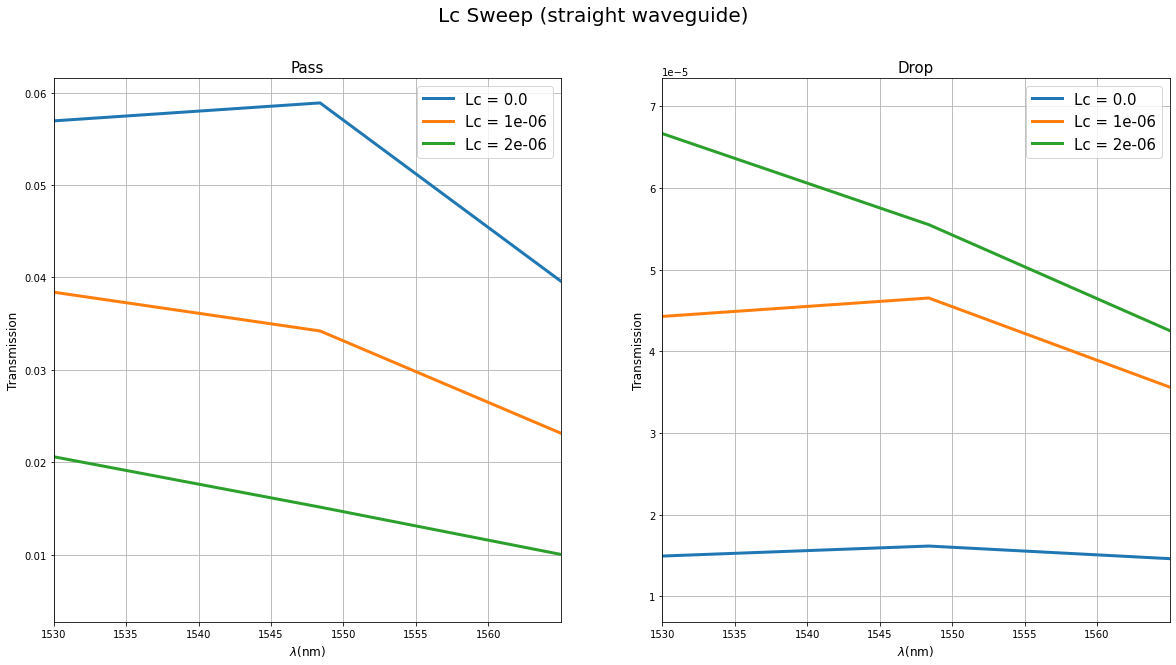

In [35]:
figure14,fig = plt.subplots(1, 2, figsize=(20,10))

values = np.linspace(0, 4e-6, 5)
Pass = fdtd.getsweepresult('Lc sweep', 'Pass')
drop = fdtd.getsweepresult('Lc sweep', 'Drop')
wavelenght = Pass['lambda']
Pass = abs((Pass['T'])**2)
drop = np.transpose(abs((drop['T'])**2))
Pass = np.transpose(Pass)

for i in range(len(Pass)):
    fig[0].plot(wavelenght*1e9, Pass[i], label = 'Lc = ' + str(values[i]), linewidth = 3)
    fig[0].set_xlim(1530, 1565)
    fig[0].set_ylabel("Transmission", fontsize = '12')
    fig[0].set_xlabel(r'$\lambda$(nm)', fontsize = '12')
    fig[0].set_xticks(np.arange(1530, 1565, step = 5), size = '12')
    fig[0].set_title('Pass', size = 15)
    fig[0].legend(loc = 'upper right', prop = {'size': 15})

    fig[1].plot(wavelenght*1e9, drop[i], label = 'Lc = ' + str(values[i]), linewidth = 3)
    fig[1].set_xlim(1530, 1565)
    fig[1].set_ylabel("Transmission", fontsize = '12')
    fig[1].set_xlabel(r'$\lambda$(nm)', fontsize = '12')
    fig[1].set_xticks(np.arange(1530, 1565, step = 5), size = '12')
    fig[1].set_title('Drop', size = 15)
    fig[1].legend(loc = 'upper right', prop = {'size': 15})

    figure14.suptitle('Lc Sweep (straight waveguide)', size = '20')

fig[0].grid()
fig[1].grid()

plt.savefig("Lc Sweep (straight waveguide)")